In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,plot_roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import pickle
import warnings
warnings.filterwarnings('ignore')

In [106]:
wine = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Labels:
- Fixed acidity	: most acids involved with wine or fixed or nonvolatile.
- Volatile acidity : the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
- Citric acid : found in small quantities, citric acid can add 'freshness' and flavor to wines.
- Residual sugar : the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter.
- Chlorides : the amount of salt in the wine.
- Free sulfur dioxide : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents.
- Total sulfur dioxide : amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2.
- Density : the density of water is close to that of water depending on the percent alcohol and sugar content.
- pH : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4.
- Sulphates : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial.
- Alcohol : Alcohol present.
## Target:
- Quality : Quality of a wine based on features and scores between 0 - 10.

In [89]:
wine.shape

(1599, 12)

Shape of the Dataset.

In [90]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values present in our dataset.

In [91]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Information of dataset:
- Range Index = 0 - 158
- Total columns = 12
- 159 values in each column
- Dtypes = float(11),int(1)

In [92]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [93]:
cor = wine.corr().abs()

Now, will check the multicolinearity between columns present in dataset.

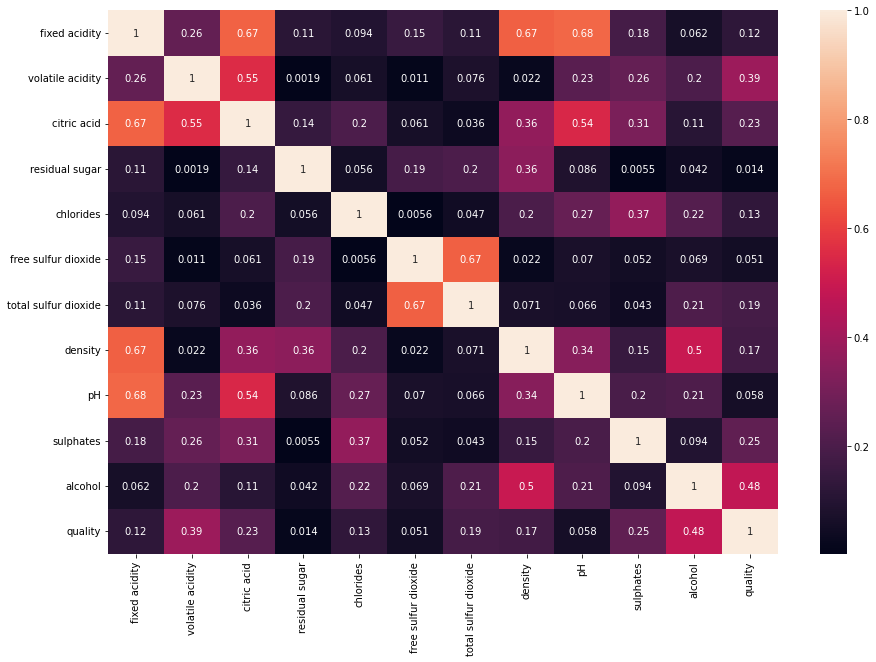

In [94]:
plt.figure(figsize = (15,10))
sns.heatmap(cor,annot=True)
plt.show()

Checking the multicolinearity using heatmap, And found that there is no multicolinearity between columns in dataset

In [95]:
x = wine.drop('quality',axis = 1)
y = wine.quality

Seperating the labels as x and target as y.

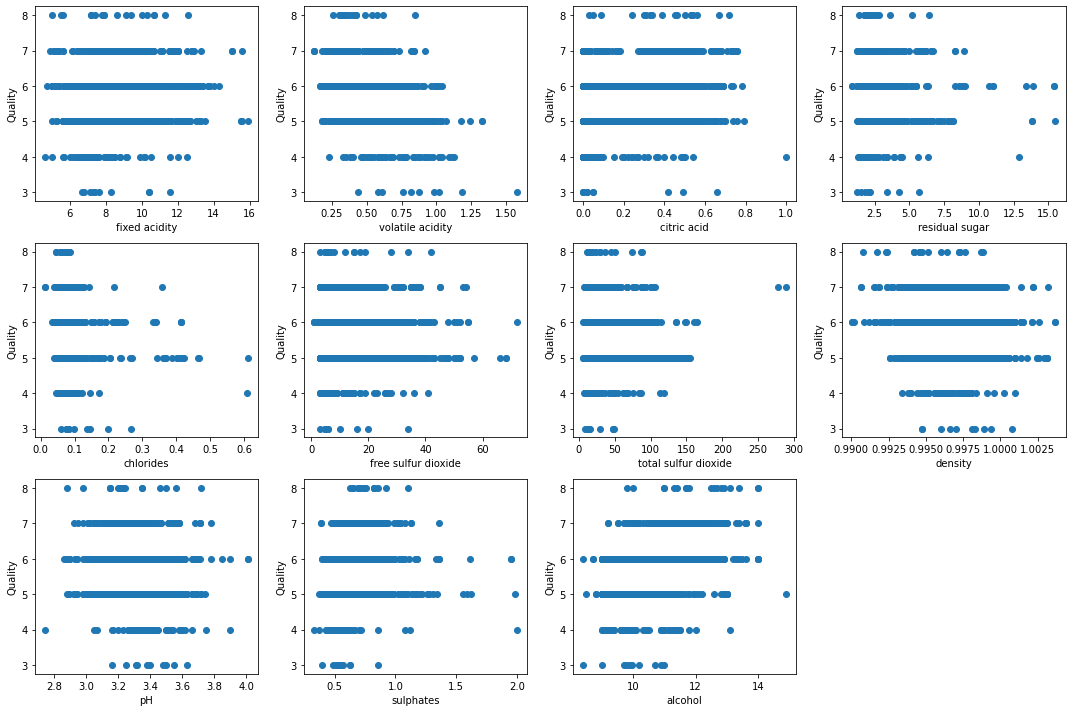

In [96]:
plt.figure(figsize=(15,10))
plotnumber = 1

for column in x:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 10)
        plt.ylabel('Quality',fontsize=10)
    plotnumber += 1
plt.tight_layout()

Checking the relationship between Labels and target using scatterplot.

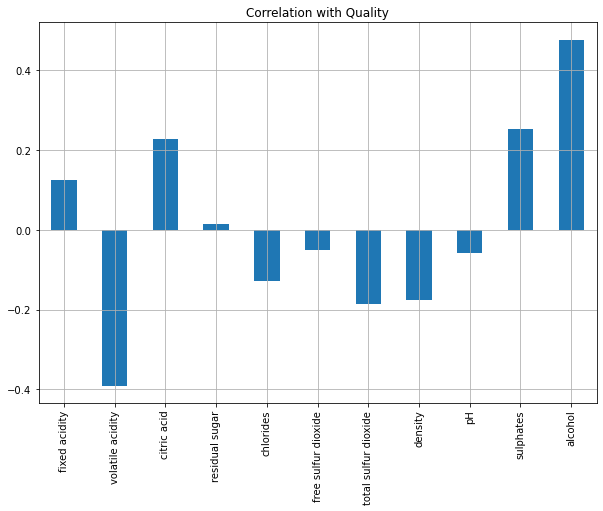

In [97]:
x.corrwith(y).plot(kind = 'bar',grid = True, figsize = (10,7), title = 'Correlation with Quality')
plt.show()

Now, checking the correlation between labels and target using barplot.

In [98]:
best_feature = SelectKBest(score_func = f_classif, k =11)
fit = best_feature.fit(x,y)

In [99]:
brt_score = pd.DataFrame(fit.scores_)
brt_column = pd.DataFrame(x.columns)

In [100]:
feature_score = pd.concat([brt_column,brt_score], axis = 1)
feature_score.columns = ['Feature Name','Scores']
feature_score.nlargest(11,'Scores')

,Feature Name,Scores
10,alcohol,115.854797
1,volatile acidity,60.913993
6,total sulfur dioxide,25.478510
9,sulphates,22.273376
2,citric acid,19.690664
7,density,13.396357
0,fixed acidity,6.283081
4,chlorides,6.035639
5,free sulfur dioxide,4.754233
8,pH,4.341764


Checking each columns score with respect to target.

In [107]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Checking the values of Target column.

In [108]:
wine['quality'] = [1 if x>=7 else 0 for x in wine.quality]

In [109]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

Converting the data into categories i.e. quality of range above and equal to 7 will be given as 1 and below 7 will be 0

In [19]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [20]:
x_fe = wine.drop('quality', axis = 1)
y_la = wine.quality

seperating the columns again.

In [21]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_fe)
x_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

Using Standard Scaler to scale the data inside the dataset.

## Training the Model

**- Train Test Split**

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y_la, test_size = 0.20, random_state = 9)

**-  Creating The function for the training and testing score, so that, we can get the results just nby calling the function**

In [23]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred))

**- Model Instantiating**

In [24]:
svc = SVC()
ada = AdaBoostClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()

**- Traing of the Models**

In [25]:
svc.fit(x_train,y_train)
ada.fit(x_train,y_train)
knn.fit(x_train,y_train)
rfc.fit(x_train,y_train)
print('Training of all Models')

Training of all Models


**- Ploting roc_auc_curve for training**

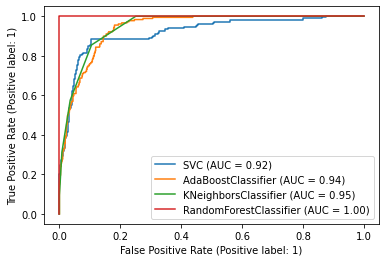

In [26]:
disp = plot_roc_curve(svc, x_train, y_train)
plot_roc_curve(ada,x_train,y_train, ax = disp.ax_)
plot_roc_curve(knn,x_train,y_train, ax = disp.ax_)
plot_roc_curve(rfc,x_train,y_train, ax = disp.ax_)
plt.legend(prop = {'size': 10}, loc = 'lower right')
plt.show()

**- Training score of each Models**

In [27]:
print(svc.score(x_train,y_train))
print(ada.score(x_train,y_train))
print(knn.score(x_train,y_train))
print(rfc.score(x_train,y_train))

0.8928850664581705
0.9061767005473026
0.910086004691165
1.0


**- Ploting roc_auc_curve for testing models.**

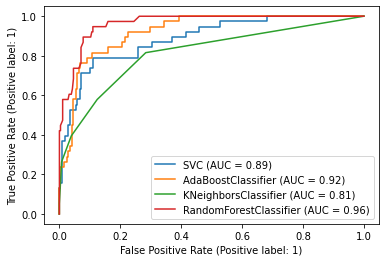

In [28]:
disp = plot_roc_curve(svc, x_test, y_test)
plot_roc_curve(ada,x_test,y_test, ax = disp.ax_)
plot_roc_curve(knn,x_test,y_test, ax = disp.ax_)
plot_roc_curve(rfc,x_test,y_test, ax = disp.ax_)
plt.legend(prop = {'size': 10}, loc = 'lower right')
plt.show()

**- Testing Score of each Model**

In [29]:
print(svc.score(x_test,y_test))
print(ada.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(rfc.score(x_test,y_test))

0.9125
0.896875
0.89375
0.9375


After training and testing of all the models, RandomForestClassifier is giving us the best score.

**- Training Score, Testing Score, Classification Report, Confusion matrix of RandomForestClassifier**

In [30]:
rfc.fit(x_train,y_train)
score(rfc, x_train,x_test,y_train,y_test,train = True)
score(rfc, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 1.0

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1100
           1       1.00      1.00      1.00       179

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279


 ----- Confusion matrix ----- 
 [[1100    0]
 [   0  179]]

 ----- Test Result ----- 

Accuracy Score: 0.928125

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       282
           1       0.83      0.50      0.62        38

    accuracy                           0.93       320
   macro avg       0.88      0.74      0.79       320
weighted avg       0.92      0.93      0.92       320


 ----- Confusion matrix ----- 
 [[278   4]
 [ 19  19]]


**- Hyperparameter Tunning**

In [119]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [50]:
params = {'n_estimators' : range(1,15),
          'criterion':['gini','entropy'],
          'max_depth':range(2,10),
          'max_features':range(0,12),
          'max_leaf_nodes':range(2,4)}

In [51]:
grid = GridSearchCV(rfc, param_grid = params)
grid.fit(x_train,y_train)
print('Best Params = ',grid.best_params_)

Best Params =  {'criterion': 'gini', 'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 3, 'n_estimators': 7}


In [64]:
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 11, max_leaf_nodes = 5, n_estimators = 7)


In [65]:
rfc.fit(x_train,y_train)
score(rfc, x_train,x_test,y_train,y_test,train = True)
score(rfc, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.8819390148553558

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.89      0.99      0.93      1100
           1       0.74      0.24      0.36       179

    accuracy                           0.88      1279
   macro avg       0.81      0.61      0.65      1279
weighted avg       0.87      0.88      0.85      1279


 ----- Confusion matrix ----- 
 [[1085   15]
 [ 136   43]]

 ----- Test Result ----- 

Accuracy Score: 0.8875

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       282
           1       0.62      0.13      0.22        38

    accuracy                           0.89       320
   macro avg       0.76      0.56      0.58       320
weighted avg       0.86      0.89      0.85       320


 ----- Confusion matrix ----- 
 [[279   3]
 [ 33   5]]


Post Tunning Result and found the negative result, as the model before tunning is giving the better results.

**- Using Pickle to save the model.**

In [80]:
filename = 'quality.ipynb'
pickle.dump(rfc, open(filename, 'wb'))